In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [2]:
import pandas as pd
data = pd.read_csv("dataset.csv")

target = data.TARGET
del data['TARGET']

In [3]:
def print_full(x):
    pd.set_option('display.max_columns', len(x))
    print(x)
    pd.reset_option('display.max_columns')
#print_full(data)

In [4]:
data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE
0,Cash loans,F,N,Y,0,256500.0,1008117.0,29475.0,841500.0,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cash loans,M,Y,N,0,202500.0,1575000.0,43312.5,1575000.0,Unaccompanied,...,0.3333,0.375,0.2714,0.3009,0.3923,0.0039,0.0023,0.3771,0.2951,0.9856
2,Cash loans,F,N,Y,0,202500.0,610335.0,20299.5,463500.0,Family,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cash loans,M,Y,N,0,337500.0,1125000.0,32895.0,1125000.0,Unaccompanied,...,0.3333,0.375,0.3572,0.3329,0.4378,0.0039,0.0000,0.4160,0.2302,0.9836
4,Cash loans,F,Y,Y,0,112500.0,862560.0,25218.0,720000.0,Unaccompanied,...,0.1667,NaN,0.0101,NaN,0.0524,NaN,0.0517,0.0798,0.0000,0.9767


# I) Conversion des strings en int


J'ai converti tous les string en int, cela est indispensable à a normalisation des données pour ensuite gérer les NaN.
Car il faudrait mettre les NaN à 0 mais étant donné que l'on ne connais pas la dynamique de chaque colonne on ne peut pas savoir si 0 est une valeur pertinente

In [5]:
def word2int(row):
    if row not in list_word:
        list_word.append(row)
    return list_word.index(row)

for name_col in data.columns:
    list_word = []
    if isinstance(data[name_col][0], str):
        data[name_col] = data[name_col].apply(word2int)

data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE
0,0,0,0,0,0,256500.0,1008117.0,29475.0,841500.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,1,1,0,202500.0,1575000.0,43312.5,1575000.0,1,...,0.3333,0.375,0.2714,0.3009,0.3923,0.0039,0.0023,0.3771,0.2951,0.9856
2,0,0,0,0,0,202500.0,610335.0,20299.5,463500.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,1,1,1,0,337500.0,1125000.0,32895.0,1125000.0,1,...,0.3333,0.375,0.3572,0.3329,0.4378,0.0039,0.0000,0.4160,0.2302,0.9836
4,0,0,1,0,0,112500.0,862560.0,25218.0,720000.0,1,...,0.1667,NaN,0.0101,NaN,0.0524,NaN,0.0517,0.0798,0.0000,0.9767


# II) Normalisation des données

In [6]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN', strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,3.000000e+05,3.000000e+05,300000.000000,3.000000e+05,300000.000000,...,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.095087,0.341687,0.340270,0.306457,0.417227,1.688453e+05,5.993297e+05,27116.376684,5.386565e+05,0.982587,...,0.226334,0.231999,0.066297,0.100794,0.107379,0.008813,0.028342,0.114229,0.087532,0.977010
std,0.293335,0.474304,0.473801,0.461022,0.722604,2.394820e+05,4.027135e+05,14489.234153,3.695075e+05,0.665862,...,0.102581,0.091511,0.051729,0.052163,0.078012,0.026468,0.046543,0.075791,0.054349,0.045728
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16537.500000,2.385000e+05,1.000000,...,0.166700,0.231999,0.062900,0.100794,0.074800,0.007700,0.006100,0.084000,0.085900,0.977010
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.485000e+05,5.135310e+05,24916.500000,4.500000e+05,1.000000,...,0.226334,0.231999,0.066297,0.100794,0.107379,0.008813,0.028342,0.114229,0.087532,0.977010
75%,0.000000,1.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,1.000000,...,0.226334,0.231999,0.066297,0.100794,0.107379,0.008813,0.028342,0.114229,0.087532,0.981600
max,1.000000,2.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
import matplotlib.pyplot as plt
import numpy as np

list_mi = []
list_ma = []
list_me = []
list_med = []

for feature, mi, ma, me, med in zip(np.array(data.columns), data.min(0), data.max(0), data.mean(0), np.median(data, axis=0)):
    list_mi.append(mi)
    list_ma.append(ma)
    list_me.append(me)
    list_med.append(med)

plt.figure(figsize=(15, 5))
length = data.shape[1]
plt.scatter(range(length), list_mi, label="min")
plt.scatter(range(length), list_me, label="mean")
plt.scatter(range(length), list_med, label="median")
plt.scatter(range(length), list_ma, label="max")
plt.xticks(range(length), data.columns, rotation=60)
plt.grid()
plt.legend()
plt.show()


<Figure size 1500x500 with 1 Axes>

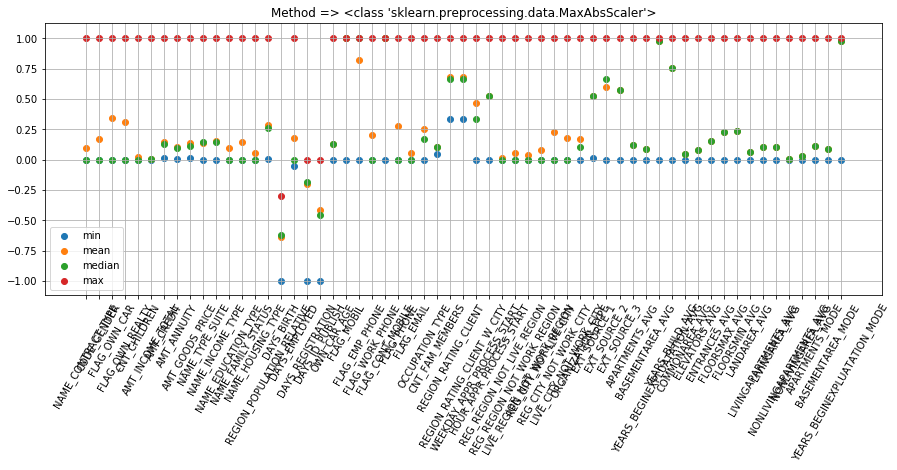

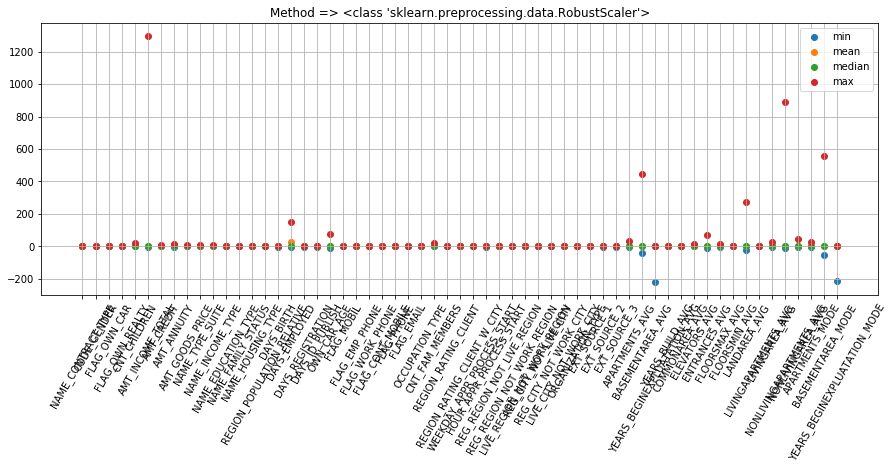

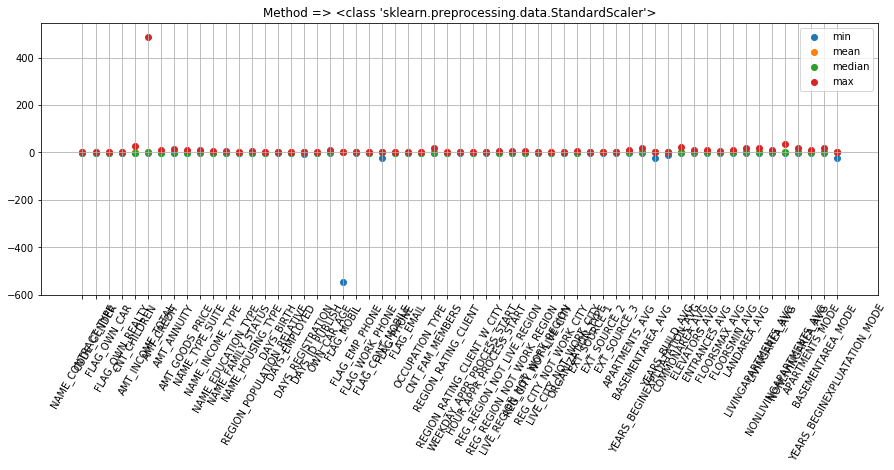

In [8]:
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, StandardScaler

def show_scale_feature(scale_method, data_train):
    scaler = scale_method()
    scaler.fit(data_train)
    data_train_scaled = scaler.transform(data_train)

    list_mi = []
    list_ma = []
    list_me = []
    list_med = []

    for feature, mi, ma, me, med in zip(np.array(data.columns), data_train_scaled.min(0), data_train_scaled.max(0), data_train_scaled.mean(0), np.median(data_train_scaled, axis=0)):
        list_mi.append(mi)
        list_ma.append(ma)
        list_me.append(me)
        list_med.append(med)

    plt.figure(figsize=(15, 5))
    plt.title("Method => {}".format(scale_method))
    length = data.shape[1]
    plt.scatter(range(length), list_mi, label="min")
    plt.scatter(range(length), list_me, label="mean")
    plt.scatter(range(length), list_med, label="median")
    plt.scatter(range(length), list_ma, label="max")
    plt.xticks(range(length), data.columns, rotation=60)
    plt.grid()
    plt.legend()
    plt.show()
    
    return data_train_scaled

list_data = []

for scale_method in [MaxAbsScaler, RobustScaler, StandardScaler]:
    list_data.append(show_scale_feature(scale_method, data))

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list_data[0][:10000], target[:10000], test_size=0.33, random_state=0)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param = {"n_neighbors": [10, 25, 50]}
model_opti = GridSearchCV(model, param, verbose=3)
model_opti.fit(X_train, y_train)

print("Le meilleur score est de {}%".format(model_opti.best_score_*100))
print("La meilleure combinaison de paramètres est {}".format(model_opti.best_params_))
print(model_opti.grid_scores_)

score = model_opti.score(X_train, y_train)
print("Score on train : {0:.2f}".format(score*100) + "%")

score = model_opti.score(X_test, y_test)
print("Score on test : {0:.2f}".format(score*100) + "%")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neighbors=10 ..................................................
[CV] ......... n_neighbors=10, score=0.9203222918531782, total=   0.7s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV] ......... n_neighbors=10, score=0.9207344379758173, total=   0.6s
[CV] n_neighbors=10 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.4s remaining:    0.0s


[CV] ......... n_neighbors=10, score=0.9207344379758173, total=   0.6s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.9203222918531782, total=   0.8s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.9207344379758173, total=   0.7s
[CV] n_neighbors=25 ..................................................
[CV] ......... n_neighbors=25, score=0.9207344379758173, total=   0.7s
[CV] n_neighbors=50 ..................................................
[CV] ......... n_neighbors=50, score=0.9203222918531782, total=   0.8s
[CV] n_neighbors=50 ..................................................
[CV] ......... n_neighbors=50, score=0.9207344379758173, total=   0.8s
[CV] n_neighbors=50 ..................................................
[CV] ......... n_neighbors=50, score=0.9207344379758173, total=   0.8s
Le meilleur score est de 92.05970149253731%
La meilleure combinaison de param

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   21.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:762: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Score on train : 92.07%
Score on test : 92.24%


In [116]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(32,2), random_state=0)
clf.fit(X_train,y_train)

score = clf.score(X_train, y_train)
print("Score on train : {0:.2f}".format(score*100) + "%")

score = clf.score(X_test, y_test)
print("Score on test : {0:.2f}".format(score*100) + "%")

Score on train : 92.81%
Score on test : 91.15%


In [79]:
from sklearn.svm import SVC

model = SVC(C = 100)
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print("Score on train : {0:.2f}".format(score*100) + "%")

score = model.score(X_test, y_test)
print("Score on test : {0:.2f}".format(score*100) + "%")

Score on train : 92.06%
Score on test : 92.24%


In [101]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0, max_depth=3)
tree.fit(X_train, y_train)

score = tree.score(X_train, y_train)
print("Score on train : {0:.2f}".format(score*100) + "%")

score = tree.score(X_test, y_test)
print("Score on test : {0:.2f}".format(score*100) + "%")

Score on train : 92.16%
Score on test : 92.21%


In [105]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
forest.fit(X_train, y_train)

score = forest.score(X_train, y_train)
print("Score on train : {0:.2f}".format(score*100) + "%")

score = forest.score(X_test, y_test)
print("Score on test : {0:.2f}".format(score*100) + "%")

Score on train : 92.52%
Score on test : 92.24%
